In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/sungsupark/Desktop/금융 프로젝트/temp_df_final.csv', index_col = 0).iloc[:, 1:]

df2 = pd.read_csv('/Users/sungsupark/Desktop/금융 프로젝트/Add_TI_섹터ETF/KODEX_운송_TI.csv', index_col = 0)
df
df2

날짜      종가    diff_5   diff_20    ma_5    ma_20
1099  2019-10-08  2710.0 -0.009141 -0.018116  2710.0  2752.50
1098  2019-10-10  2685.0 -0.023636 -0.016484  2697.0  2750.25
1097  2019-10-11  2725.0  0.001838  0.005535  2698.0  2751.00
1096  2019-10-14  2795.0  0.039033  0.021938  2719.0  2754.00
1095  2019-10-15  2780.0  0.037313  0.000000  2739.0  2754.00
...          ...     ...       ...       ...     ...      ...
4     2024-03-15  4730.0 -0.010460 -0.052104  4776.0  4946.50
3     2024-03-18  4705.0 -0.013627 -0.065541  4763.0  4930.00
2     2024-03-19  4650.0 -0.020021 -0.087341  4744.0  4907.75
1     2024-03-20  4640.0 -0.016949 -0.090196  4728.0  4884.75
0     2024-03-21  4665.0 -0.050865 -0.091529  4678.0  4861.25

[1100 rows x 6 columns]

In [17]:
# Converting 'stateDt' to datetime format
df['stateDt'] = pd.to_datetime(df['stateDt'], format='%Y%m%d')


# Renaming the 'stateDt' column to 'Date'
df.rename(columns={'stateDt': 'Date'}, inplace=True)


df.tail()  # Display the last few rows to check the changes


Date   decideCnt  deathCnt
1106 2023-04-15  30978954.0   34368.0
1107 2023-04-17  30994088.0   34376.0
1108 2023-04-18  31009261.0   34386.0
1109 2023-04-19  31025769.0   34392.0
1110 2023-04-20  31039863.0   34401.0

In [18]:
# '날짜'와 '종가' 컬럼 이름 변경
df2.rename(columns={'날짜': 'Date', '종가': 'Close'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2['diff_1'] = df2['Close'].pct_change()





df2.head()  # 변경된 데이터프레임의 마지막 몇 행을 확인합니다.


Date   Close    diff_5   diff_20    ma_5    ma_20    diff_1
1099 2019-10-08  2710.0 -0.009141 -0.018116  2710.0  2752.50       NaN
1098 2019-10-10  2685.0 -0.023636 -0.016484  2697.0  2750.25 -0.009225
1097 2019-10-11  2725.0  0.001838  0.005535  2698.0  2751.00  0.014898
1096 2019-10-14  2795.0  0.039033  0.021938  2719.0  2754.00  0.025688
1095 2019-10-15  2780.0  0.037313  0.000000  2739.0  2754.00 -0.005367

In [19]:
# df에서 decideCnt와 deathCnt의 차이를 계산하고, 이를 %로 변환
df['decideCnt_diff'] = df['decideCnt'].diff().fillna(0)
df['deathCnt_diff'] = df['deathCnt'].diff().fillna(0)
df['decideCnt_diff_perc'] = df['decideCnt_diff'] / df['decideCnt'].shift(5)
df['deathCnt_diff_perc'] = df['deathCnt_diff'] / df['deathCnt'].shift(5)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # 무한대 값을 NaN으로 대체

# df2와 df를 'Date' 기준으로 합치기
df_combined = pd.merge(df2, df[['Date', 'decideCnt_diff_perc', 'deathCnt_diff_perc']], on='Date', how='outer')

# NaN이 포함된 행 제거
df_combined.dropna(inplace=True)

df_combined.tail()

Date   Close    diff_5   diff_20    ma_5    ma_20    diff_1  \
871 2023-04-14  4870.0  0.022036  0.016701  4813.0  4807.00  0.005160   
872 2023-04-17  4930.0  0.042283  0.033543  4853.0  4815.00  0.012320   
873 2023-04-18  4960.0  0.035491  0.033333  4887.0  4823.00  0.006085   
874 2023-04-19  4985.0  0.032091  0.043979  4918.0  4833.50  0.005040   
875 2023-04-20  4980.0  0.027864  0.047319  4945.0  4844.75 -0.001003   

     decideCnt_diff_perc  deathCnt_diff_perc  
871             0.000377            0.000146  
872             0.000489            0.000233  
873             0.000490            0.000291  
874             0.000533            0.000175  
875             0.000455            0.000262

In [20]:
df_combined



Date   Close    diff_5   diff_20    ma_5    ma_20    diff_1  \
96  2020-02-27  2900.0  0.021127  0.033868  2802.0  2861.75  0.021127   
97  2020-02-28  2865.0  0.017762  0.021390  2812.0  2864.75 -0.012069   
98  2020-03-02  2855.0  0.049632  0.028829  2839.0  2868.75 -0.003490   
99  2020-03-03  3045.0  0.113346  0.070299  2901.0  2878.75  0.066550   
100 2020-03-04  3160.0  0.112676  0.114638  2965.0  2895.00  0.037767   
..         ...     ...       ...       ...     ...      ...       ...   
871 2023-04-14  4870.0  0.022036  0.016701  4813.0  4807.00  0.005160   
872 2023-04-17  4930.0  0.042283  0.033543  4853.0  4815.00  0.012320   
873 2023-04-18  4960.0  0.035491  0.033333  4887.0  4823.00  0.006085   
874 2023-04-19  4985.0  0.032091  0.043979  4918.0  4833.50  0.005040   
875 2023-04-20  4980.0  0.027864  0.047319  4945.0  4844.75 -0.001003   

     decideCnt_diff_perc  deathCnt_diff_perc  
96              1.166282            0.500000  
97              0.948505            0.000000  
98              0.377478            0.333333  
99              0.339751            0.461538  
100             0.220796            0.307692  
..                   ...                 ...  
871             0.000377            0.000146  
872             0.000489            0.000233  
873             0.000490            0.000291  
874             0.000533            0.000175  
875             0.000455            0.000262  

[753 rows x 9 columns]

Processing Window 20:   0%|          | 0/734 [00:00<?, ?it/s]/Users/sungsupark/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/sungsupark/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/sungsupark/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/sungsupark/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/sungsupark/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Use

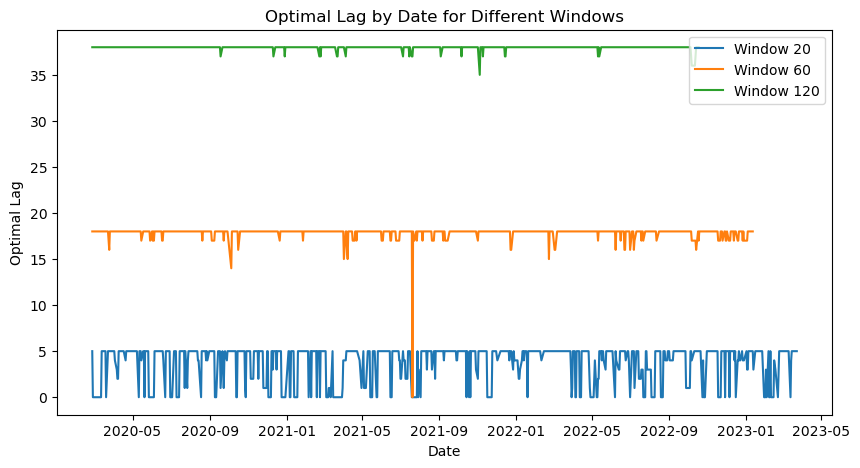

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from tqdm import tqdm 

windows = [20, 60, 120, 240]
max_lags = {20: 5, 60: 18, 120: 38, 240: 78}

def optimal_lag(df_combined, window, max_lag):
    optimal_lags = []
    # tqdm is used here to show progress
    for start in tqdm(range(len(df_combined) - window + 1), desc=f'Processing Window {window}'):
        sub_df_combined = df_combined.iloc[start:start + window]
        best_p_value = float('inf')
        best_lag = 0
        for lag in range(1, max_lag + 1):
            result = grangercausalitytests(sub_df_combined[['diff_5', 'decideCnt_diff_perc']], maxlag=lag, verbose=False)
            p_value = result[lag][0]['ssr_chi2test'][1] 
            if p_value < best_p_value:
                best_p_value = p_value
                best_lag = lag
        if best_p_value > 0.1:
            best_lag = 0
        optimal_lags.append(best_lag)
    return optimal_lags + [np.nan] * (window - 1) 


for window in windows:
    max_lag = max_lags[window]
    df_combined[f'optimal_lag_{window}'] = optimal_lag(df_combined, window, max_lag)

plt.figure(figsize=(10, 5))
for window in windows:
    plt.plot(df_combined['Date'], df_combined[f'optimal_lag_{window}'], label=f'Window {window}')
plt.xlabel('Date')
plt.ylabel('Optimal Lag')
plt.title('Optimal Lag by Date for Different Windows')
plt.legend()
plt.show()

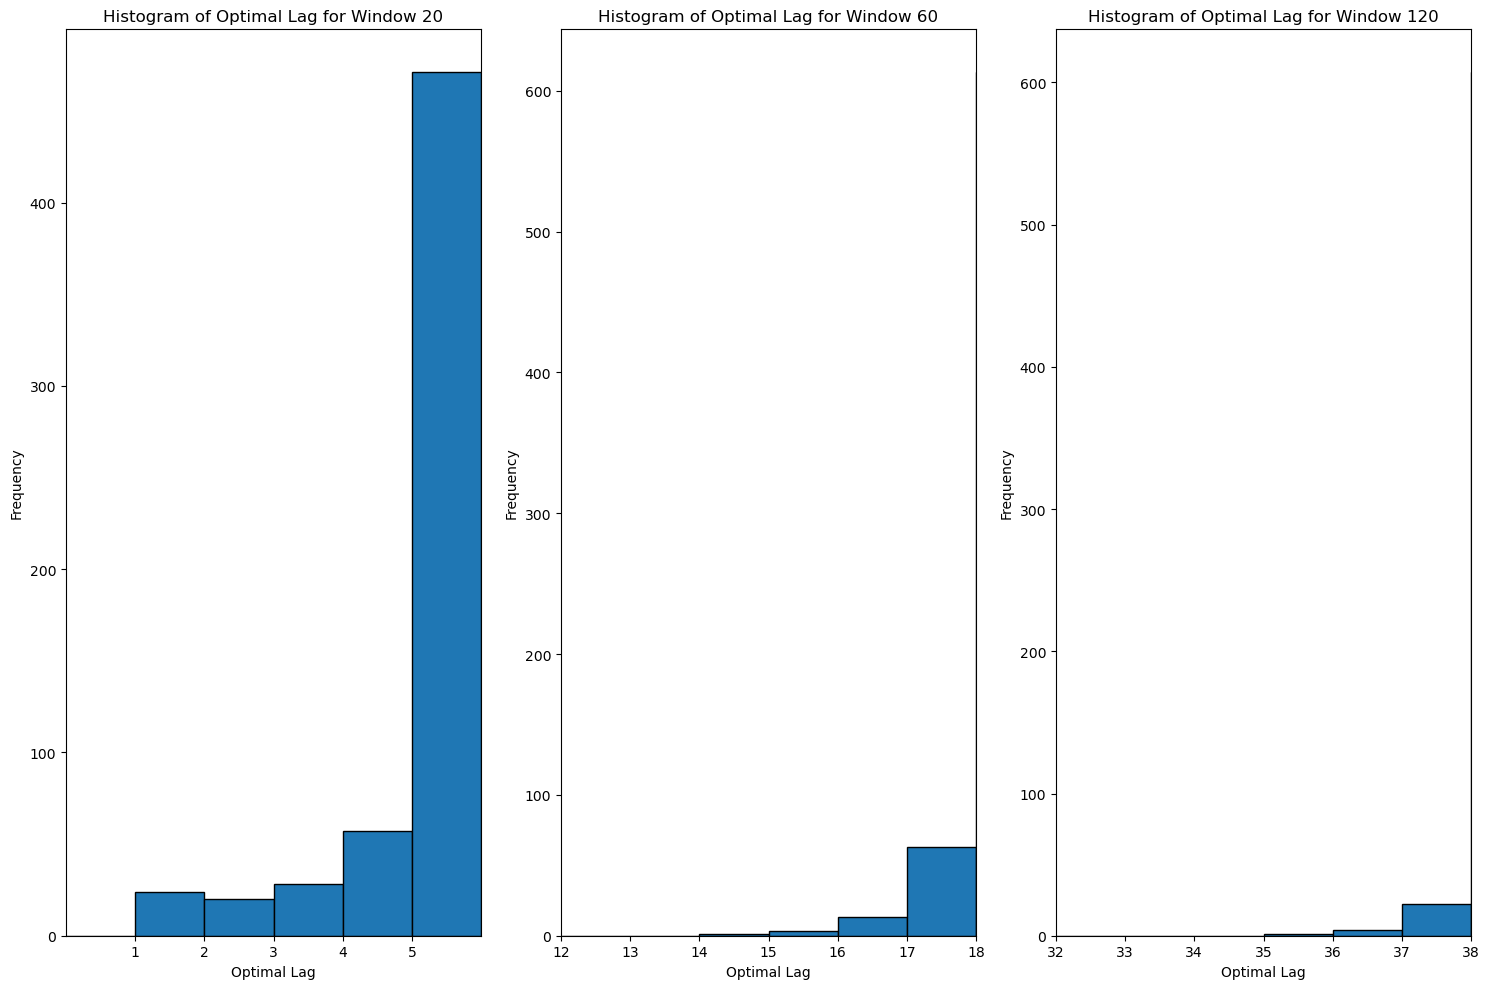

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs = axs.flatten()

for i, window in enumerate(windows):
    optimal_lag_column = df_combined[f'optimal_lag_{window}']
    # Filter out lag = 0 and lag = max_lag
    filtered_lag = optimal_lag_column[(optimal_lag_column != 0)]
    axs[i].hist(filtered_lag.dropna(), bins=range(int(filtered_lag.max()) + 2), edgecolor='black')
    axs[i].set_title(f'Histogram of Optimal Lag for Window {window}')
    axs[i].set_xlabel('Optimal Lag')
    axs[i].set_ylabel('Frequency')

    if window == 20:
        axs[i].set_xticks(range(1, 6))
        axs[i].set_xlim(0, 6)
    elif window == 60:
        axs[i].set_xticks(range(12, 19))
        axs[i].set_xlim(12, 19)
    elif window == 120:
        axs[i].set_xticks(range(32, 39))
        axs[i].set_xlim(32, 39)


plt.tight_layout()
plt.show()